In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape
%matplotlib inline

In [36]:
data = pd.read_csv('digikala-orders.csv')
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [37]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])
data['DateYearMonth'] = data['DateTime_CartFinalize'].map(lambda data: data.year * 100 + data.month)
data['DateMonth'] = data['DateTime_CartFinalize'].map(lambda data: data.month)
data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,DateYearMonth,DateMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510,10
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802,2
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606,6
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809,9
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605,5
...,...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01,344037.0,تهران,2.0,201804,4
199996,4425393,3745774,131645,2016-07-09 19:14:09,600000.0,محمدیه,1.0,201607,7
199997,6671889,4845514,215045,2017-03-08 23:47:06,450000.0,اصفهان,1.0,201703,3
199998,6315995,2541418,264021,2017-02-08 14:59:39,193486.0,همدان,1.0,201702,2


In [38]:
# Part A solution
OrdersCountPerYearMonth_count = data.groupby(['DateYearMonth'])['ID_Order'].count().reset_index()
OrdersCountPerYearMonth_count

,DateYearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141
...,...,...
59,201808,6040
60,201809,6567
61,201810,5547
62,201811,6002


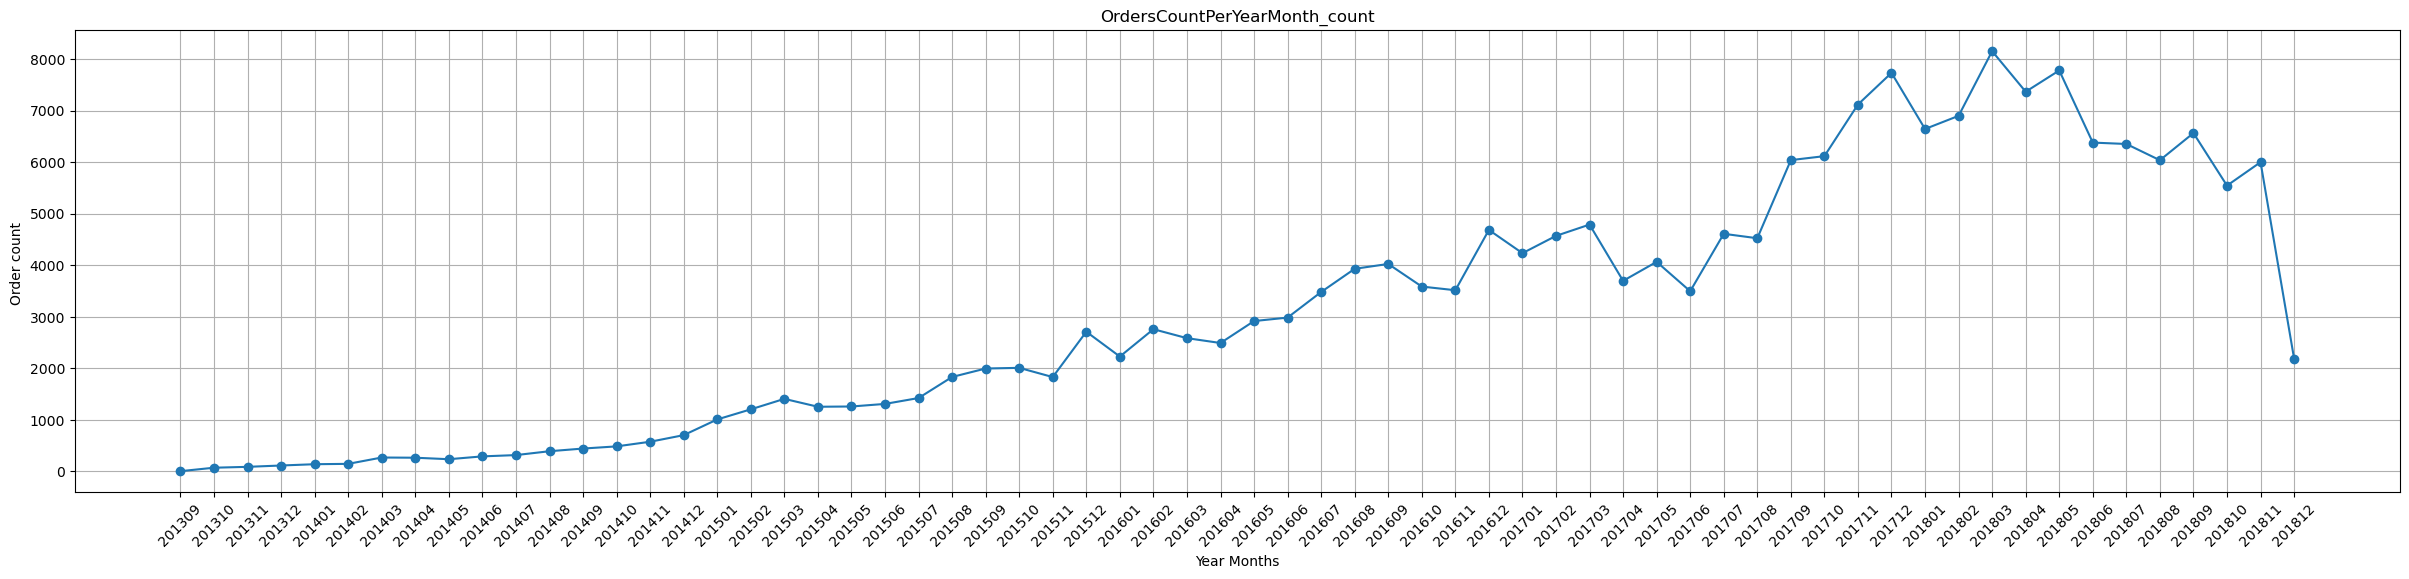

In [39]:
plt.figure(figsize=(30,6))
plt.plot(OrdersCountPerYearMonth_count['DateYearMonth'].to_numpy(dtype=str), OrdersCountPerYearMonth_count['ID_Order'], marker='o')
plt.title('OrdersCountPerYearMonth_count')
plt.xticks(rotation=45)
plt.xlabel('Year Months')
plt.ylabel('Order count ')
plt.grid()
plt.show()

In [40]:
OrdersCountPerMonth_nunique = data.groupby(['DateMonth'])['ID_Order'].nunique().reset_index()
OrdersCountPerMonth_nunique

,DateMonth,ID_Order
0,1,14087
1,2,15396
2,3,17038
3,4,14932
4,5,16074
5,6,14315
6,7,16014
7,8,16506
8,9,18781
9,10,17624


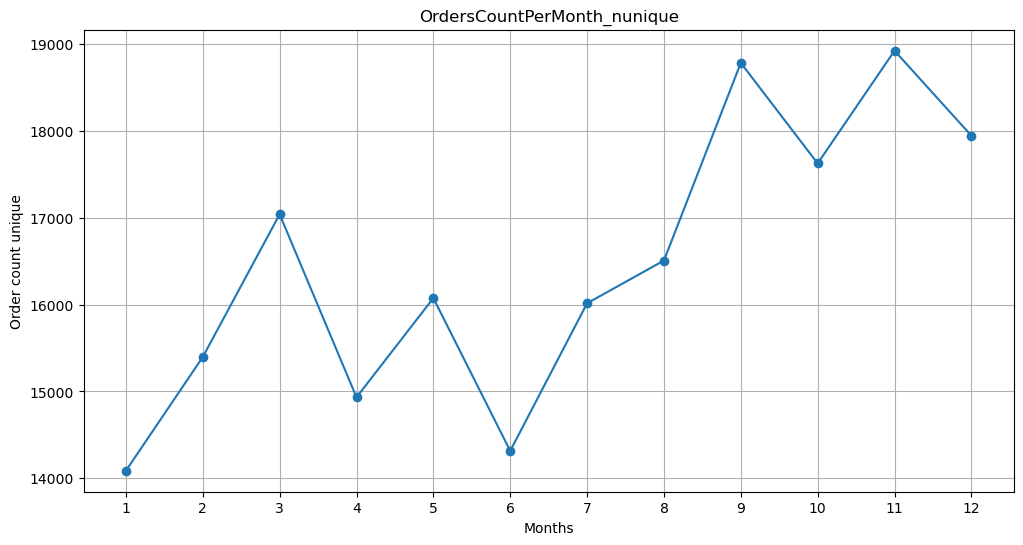

In [41]:
plt.figure(figsize=(12,6))
plt.plot(OrdersCountPerMonth_nunique['DateMonth'].to_numpy(dtype=str), OrdersCountPerMonth_nunique['ID_Order'], marker='o')
plt.title('OrdersCountPerMonth_nunique')
plt.xlabel('Months')
plt.ylabel('Order count unique')
plt.grid()
plt.show()

In [42]:
OrdersCountPerMonth_count = data.groupby(['DateMonth'])['ID_Order'].count().reset_index()
OrdersCountPerMonth_count

,DateMonth,ID_Order
0,1,14263
1,2,15588
2,3,17214
3,4,15084
4,5,16268
5,6,14470
6,7,16193
7,8,16726
8,9,19085
9,10,17825


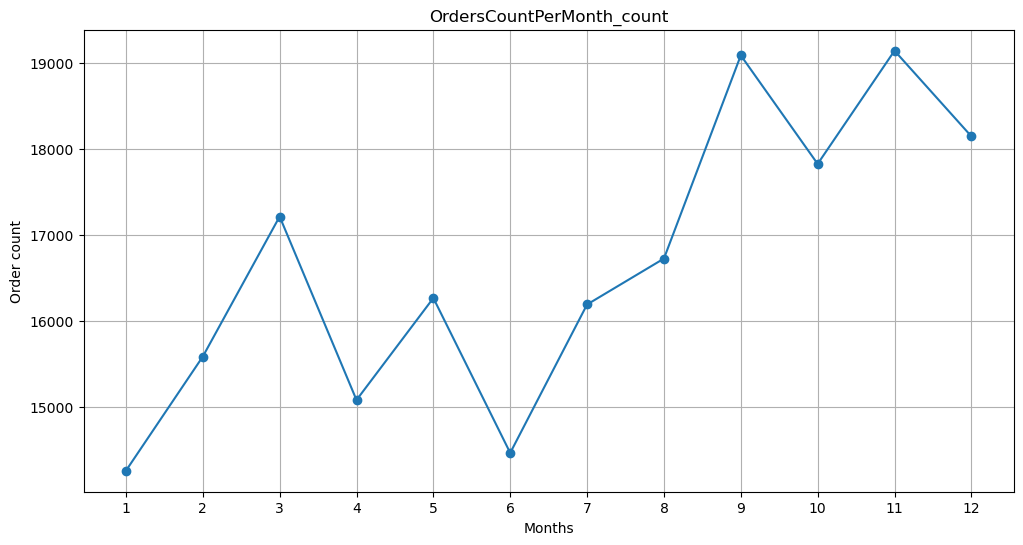

In [43]:
plt.figure(figsize=(12,6))
plt.plot(OrdersCountPerMonth_count['DateMonth'].to_numpy(dtype=str), OrdersCountPerMonth_count['ID_Order'], marker='o')
plt.title('OrdersCountPerMonth_count')
plt.xlabel('Months')
plt.ylabel('Order count')
plt.grid()
plt.show()

In [44]:
# Part B solution

CustomersCountPerCity = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
CustomersCountPerCity

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [45]:
result = CustomersCountPerCity.sort_values('ID_Customer', ascending=False)[:20]
other_count = CustomersCountPerCity.sort_values('ID_Customer', ascending=False)[20:]['ID_Customer'].sum()
result.loc[len(result)] = ['others', other_count]

result

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075
593,قم,1905
818,کرمانشاه,1718


([<matplotlib.patches.Wedge at 0x1d18b51a5c0>,
 [Text(-0.09416463978919372, 1.0959621437866236, 'ﻥﺍﺮﻬﺗ'),
  Text(-1.060538746867481, -0.291988983341416, 'ﺝﺮﮐ'),
  Text(-0.9849527356688511, -0.4897633188576361, 'ﺪﻬﺸﻣ'),
  Text(-0.8741607593157904, -0.6677147346527866, 'ﻥﺎﻬﻔﺻﺍ'),
  Text(-0.7535317411469326, -0.8013675280943647, 'ﺯﺍﻮﻫﺍ'),
  Text(-0.6420393007076726, -0.8931884103294236, 'ﺯﺍﺮﯿﺷ'),
  Text(-0.5379892177034024, -0.9594621418455661, 'ﺖﺷﺭ'),
  Text(-0.4478204490947437, -1.0047172962443627, 'ﺰﯾﺮﺒﺗ'),
  Text(-0.3647004834613798, -1.0377830010956222, 'ﻢﻗ'),
  Text(-0.28692453461940237, -1.0619201059559233, 'ﻩﺎﺸﻧﺎﻣﺮﮐ'),
  Text(-0.21373252325394626, -1.0790358698873275, 'ﺩﺰﯾ'),
  Text(-0.14988364051003758, -1.0897407463738602, 'ﻥﺎﻣﺮﮐ'),
  Text(-0.09425438274624615, -1.0959544294053125, 'ﯼﺭﺎﺳ'),
  Text(-0.04345856611634767, -1.0991411888520561, 'ﻦﯾﻭﺰﻗ'),
  Text(0.0017647698407222947, -1.0999985843570024, 'ﻥﺍﺪﻤﻫ'),
  Text(0.045749686416466866, -1.099048209221413, 'ﺱﺎﺒﻋ ﺭﺪﻨﺑ'),
  Text(

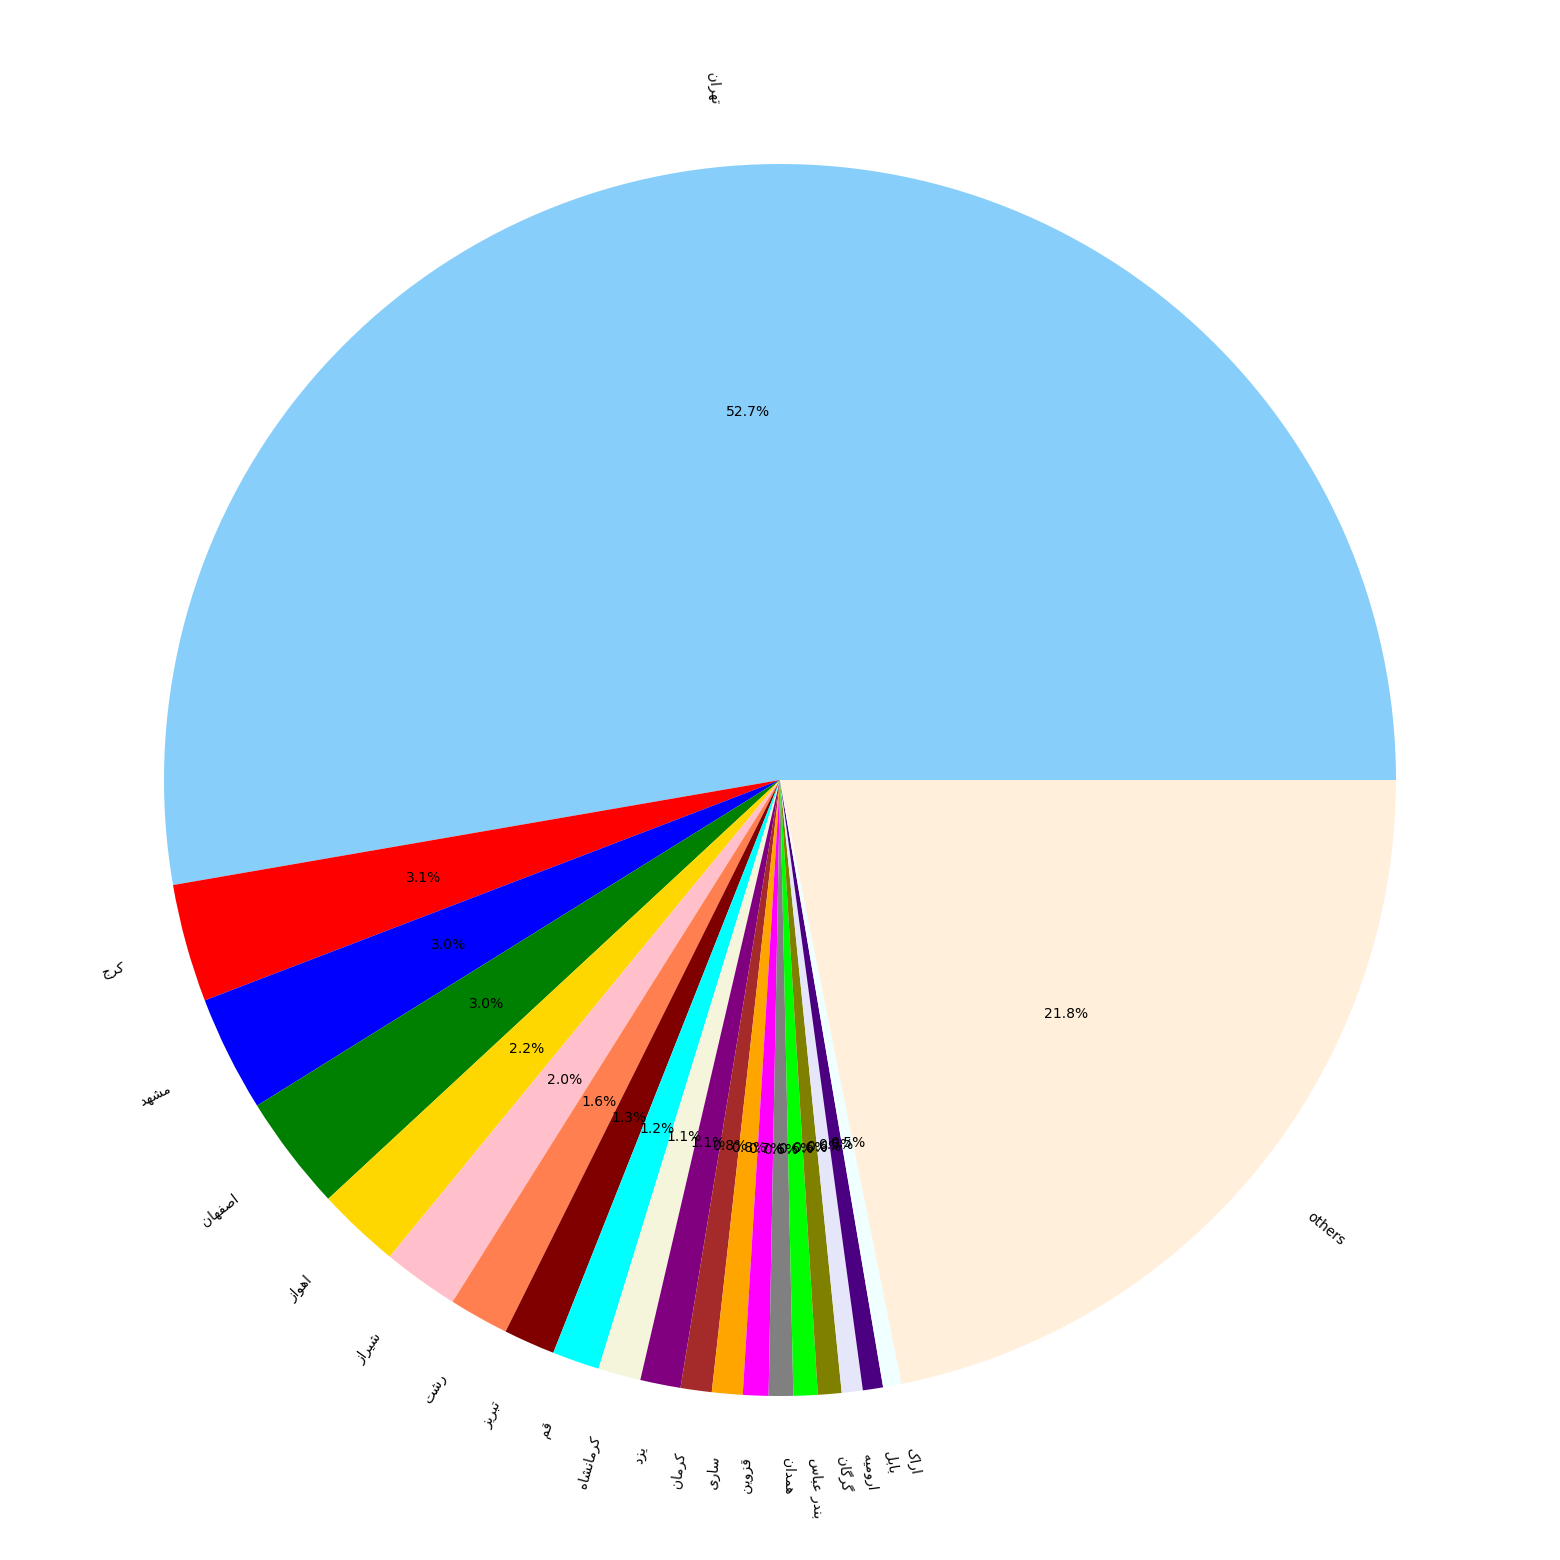

In [56]:
persian_labels = [get_display(reshape(label)) for label in result['city_name_fa'].to_numpy(dtype='str')]

color_list = ['lightskyblue', 'red', 'blue', 'green', 'gold', 'pink', 'coral', 'Maroon', 'cyan', 'beige',
              'purple', 'brown', 'orange', 'fuchsia', 'gray', 'lime', 'olive', 'lavender','indigo', 'azure', '#FFEFDB',
              '	#66CDAA']
plt.figure(figsize=(20,20))
plt.pie(result['ID_Customer'], labels=persian_labels, autopct='%1.1f%%',rotatelabels=True, colors= color_list)
